### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

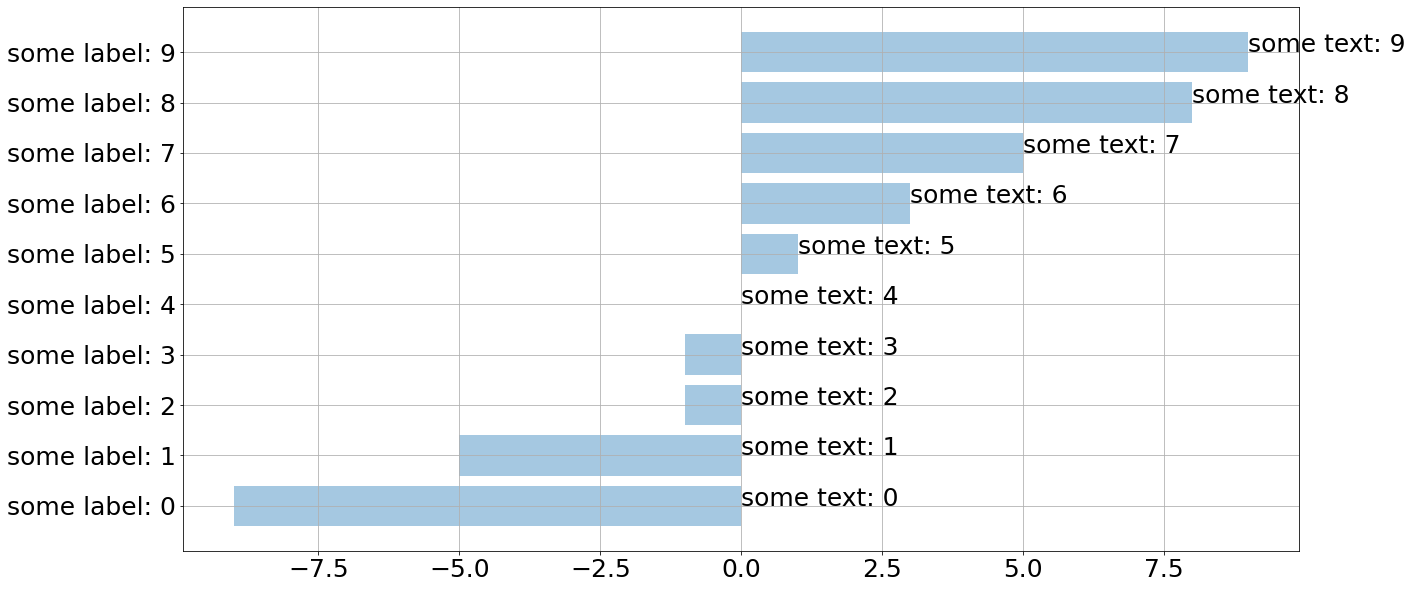

In [1]:
import numpy as np
import pandas as pd
import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль

import warnings
warnings.filterwarnings('ignore')

def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.grid(True)
    ax.barh(yticks_labels, bars_length, align='center', alpha=0.4)
    for x, y, label in zip(bars_length, yticks_labels, labels):
        plt.annotate(label, xy=(x if x > 0 else 0, y), size=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(25)
    plt.show()

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

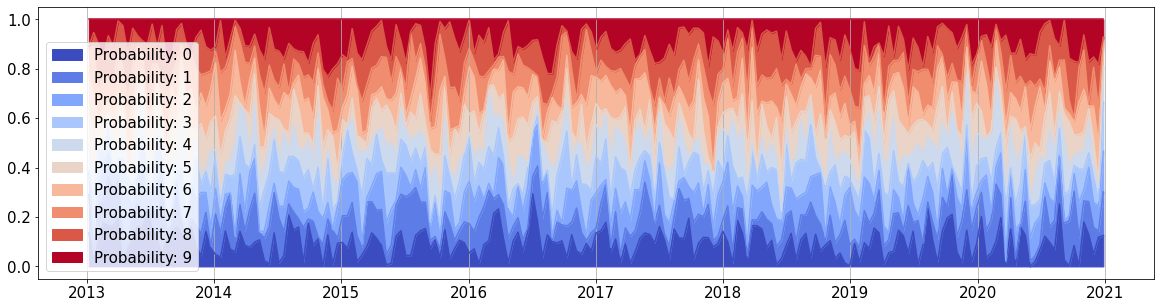

In [2]:
from matplotlib import cm
from numpy import linspace

def plot_time_probabilities(probabilities_in_time, figsize):
    probabilities_in_time.head()
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    plt.grid(axis="x")
    start = 0.0
    stop = 1.0
    number_of_lines= 10
    cm_subsection = linspace(start, stop, number_of_lines)
    colors = [ cm.coolwarm(x) for x in cm_subsection ]
    for column in probabilities_in_time:
        color = colors[column]
        label = f'Probability: {column}'
        if column > 0:
            y_new = y + probabilities_in_time[column]
            ax.fill_between(y_new.index, y, y_new, color=color, label=label)
        else:
            y_new = probabilities_in_time[column]
            ax.fill_between(y_new.index, y_new, color=color, label=label)
        ax.plot(y_new, color=color)
        y = y_new
    plt.legend(loc='lower left', fontsize=15)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
        
    plt.show()

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

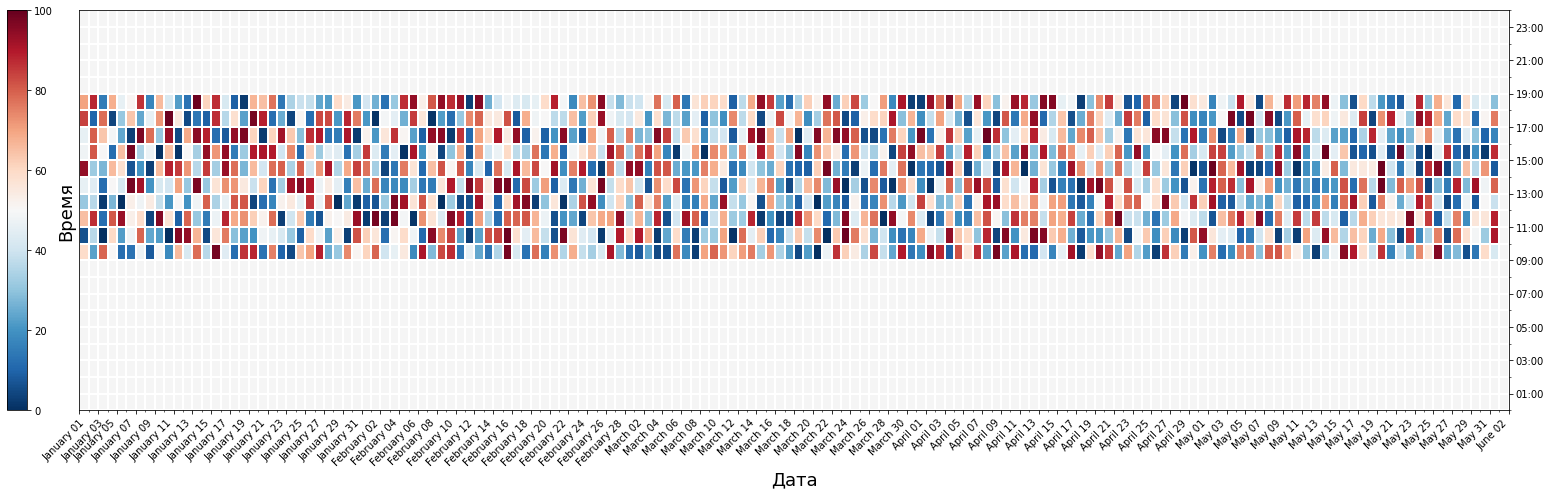

In [25]:
import datetime
from matplotlib.ticker import (MultipleLocator)
import matplotlib.dates as mdates

def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

def plot_intraday_ts(intraday_ts, figsize):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    dates = intraday_ts.index.to_pydatetime()
    #x = [x.date().strftime("%B %d, %Y") for x in dates]
    #y = [y.time().strftime("%H:%M") for y in dates]
    x = np.unique([x.date() for x in dates])
    #x = [item for item in x]
    #print(x)
    #y = np.unique([y.time().strftime("%H:%M") for y in dates])
    y = np.unique([y.time() for y in dates])
    #print(y)
    df = pd.DataFrame(columns=x, index=y)
    df = df.fillna(np.nan)
    #print(dir(datetime.date))
    #print([type(item) for item in x[1::2]])
    #print([item.hour for item in y])
    #print(type(df.iloc[0,0]))
    for index, value in intraday_ts.items():
        index_as_date = index.to_pydatetime()
        df.loc[index_as_date.time(), index_as_date.date()] = value
    #print(df)
    df = df.replace(np.nan,-1)
    #print(df)
    #x = [x.timestamp() for x in dates]
    #y = [y.timestamp() for y in dates]
    #z = intraday_ts.values
    #X = np.tile(x, (24,1))
    #Y = np.tile(y, (24,1))
    #Z = np.tile(z, (24,1))
    plt.xlabel('Дата', fontsize=18)
    plt.ylabel('Время', fontsize=18)
    #plt.xticks([item for item in x[1::2]], [item.strftime("%B %d, %Y") for item in x[1::2]], rotation=45)
    #plt.xticks(x, [str(item) for item in x])
    #ax.set_xticks(x, minor=False)
    #ax.set_xticklabels([str(item) for item in x])
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    #print(x)
    #x = x[::2]
    
    ax.xaxis.set_major_locator(MultipleLocator(2))
    date_form = mdates.DateFormatter("%B %d")
    ax.xaxis.set_major_formatter(date_form)
    #ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

    # For the minor ticks, use no labels; default NullFormatter.
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    
    
    #ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    #x = x[::2]
    #ax.set_xticks(np.arange(len(x)))
    #x = x[::2]
    #x_labels = [item.strftime("%B %d, %Y") for item in x]
    #print(df.columns)
    #ax.set_xticks(np.arange(len(x)), minor=False)
    #ax.set_xticklabels(x_labels)
    
    #plt.gcf().autofmt_xdate()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    
    
    
    
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    plt.yticks([item.hour for item in y[1::2]], [item.strftime("%H:%M") for item in y[1::2]])
    ax.yaxis.set_ticks_position('right')
    #fig.tight_layout()
    
    #ax.imshow(df)
    cs = ax.pcolor(df, cmap='RdBu_r', vmin=0, vmax=100)
    cs.cmap.set_under('whitesmoke')
    cb = fig.colorbar(cs, location='left', pad=0.03)
    cb.ax.yaxis.set_ticks_position("right")
    
    #cs.orientation='vertical'
    #cs.location='right'
    #сs = ax.pcolor(np.tile(intraday_ts.values, (24,1)), cmap='RdBu')
    #x_ticks = [to_integer(item) for item in x[1::2]]
    #print(df)
    #ax.set_xticks(x, minor=False)
    #ax.set_yticks(y, minor=False)
    #ax.grid(True)
    #ax.xaxis.set_ticks_position('bottom')
    #ax.yaxis.set_ticks_position('right')
    #for tick in ax.yaxis.get_magor_ticks():
    #    print(tick.label)
    #    tick.label.set_fontsize(15)
    #print([to_integer(item) for item in x[1::2]])
    #print(x)
    #plt.
    #plt.imshow(intraday_ts, cmap='RdBu')
    
    #for tick in ax.xaxis.get_major_ticks():
    #    tick.label.set_fontsize(25)
    ax.grid(b=True, which='both', color='w', linestyle='-', linewidth=2.0)
        
    fig.tight_layout()
    plt.show()
    

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)

#intraday_ts.index
#intraday_ts.to_numpy()
#dates = intraday_ts.index.to_pydatetime()
#x = [x.timestamp() for x in dates]
#x
#dt.timestamp()
#x = [int(round(x.timestamp() * 1000)) for x in dates]
#y = [int(round(y.time() * 1000)) for y in dates]
#x = [x.date().strftime("%B %d, %Y") for x in dates]
#y = [y.time().strftime("%H:%M") for y in dates]
#y
#intraday_ts.index.shape
#type(intraday_ts[0])
plot_intraday_ts(intraday_ts, figsize)

#intraday_ts[:1]

#y = [(index.to_pydatetime(), value) for index, value in intraday_ts.items()]
#y
#result =np.array(intraday_ts.tolist())
#result
#help(plt.pcolor)



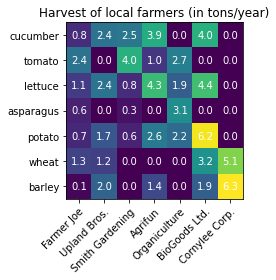

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

plt.xticks(np.arange(len(farmers)), farmers)
plt.yticks(np.arange(len(vegetables)), vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [5]:
#!pip install matplotlib=3.4.2